In [10]:
import os
import cv2
import numpy as np
from imutils import paths

In [2]:
datapath = r"C:\Users\vedan\Downloads\data\data"
outputmodel = r"C:\Users\vedan\Downloads\data\video_classification_model\videoclassificationmodel_VGG19"
outputlabelbinarizer = r"C:\Users\vedan\Downloads\data\model\videoclassificationoinarizerVGG19"
epoch = 25

In [12]:
from sklearn.preprocessing import LabelBinarizer

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
from keras.preprocessing.image import ImageDataGenerator

In [6]:
sports_labels = set(["basketball", "ballet", "dancehall", "hiphop", "house", "salsa", "jazz", "indianclassical"])
print("images is being uploaded.....")
pathToImages = list(paths.list_images(datapath))
data = []
labels = []

for images in pathToImages:
    label = images.split(os.path.sep)[-2]
    if label not in sports_labels:
        continue
    image = cv2.imread(images)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    data.append(image)
    labels.append(label)


images is being uploaded.....


In [7]:
data = np.array(data)
labels = np.array(labels)
lb = LabelBinarizer()
labels = lb.fit_transform(labels)


In [8]:
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.25, stratify=labels, random_state=42)

In [9]:
# print(X_train)

In [10]:
trainAugmentation = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

validationAugmentation = ImageDataGenerator()
mean = np.array([123.68, 110.779, 103.939], dtype="float32")
trainAugmentation.mean = mean
validationAugmentation.mean = mean

In [11]:
# from keras.applications import ResNet50
# from keras.applications import VGG19
from keras.applications import VGG16

from keras.layers import Input
from keras.layers.pooling import AveragePooling2D
from keras.layers.core import Flatten
from keras.layers.core import Dense

from keras.layers.core import Dropout

from keras.models import Model
from keras.optimizers import SGD

In [14]:
# baseModel = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(224,244,3)))
# baseModel = VGG19(include_top=False, weights='imagenet', input_tensor=Input(shape=(224,244,3)))
baseModel = VGG16(include_top=False, weights='imagenet', input_tensor=Input(shape=(224,244,3)))

58892288/58889256 [==============================] - 5s 0us/step


In [15]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7,7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
# headModel = Reshape((64, -1))(headModel)
# # Just write this Permute after, its complicated why
# headModel = Permute((2, 1))(headModel)
# # it can also be an LSTM
# headModel = SimpleRNN(128, activation='relu')(headModel)
# headModel = Dropout(0.5)(headModel)
headModel = Dense(len(lb.classes_), activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)

opt = SGD(lr = 0.0001, momentum=0.9, decay=1e-4/epoch)
# https://keras.io/api/optimizers/sgd/
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
model.summary()

for basemodelLayers in baseModel.layers:
    basemodelLayers.trainable = False

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 244, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 244, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 244, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 122, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 122, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 122, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 61, 128)      

In [16]:
opt = SGD(lr = 0.0001, momentum=0.9, decay=1e-4/epoch)
# https://keras.io/api/optimizers/sgd/

In [17]:
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [18]:
History = model.fit_generator(
    trainAugmentation.flow(X_train, Y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    validation_data=validationAugmentation.flow(X_test, Y_test),
    validation_steps=len(X_test) // 32,
    epochs=epoch
)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
93/93 [==============================] - 330s 4s/step - loss: 3.9897 - accuracy: 0.3458 - val_loss: 1.1180 - val_accuracy: 0.6774
Epoch 2/25
93/93 [==============================] - 320s 3s/step - loss: 1.7699 - accuracy: 0.5910 - val_loss: 0.6873 - val_accuracy: 0.7762
Epoch 3/25
93/93 [==============================] - 323s 3s/step - loss: 1.2128 - accuracy: 0.6788 - val_loss: 0.5736 - val_accuracy: 0.8125
Epoch 4/25
93/93 [==============================] - 335s 4s/step - loss: 0.9869 - accuracy: 0.7177 - val_loss: 0.4126 - val_accuracy: 0.8700
Epoch 5/25
93/93 [==============================] - 384s 4s/step - loss: 0.7846 - accuracy: 0.7737 - val_loss: 0.3863 - val_accuracy: 0.8901
Epoch 6/25
93/93 [==============================] - 389s 4s/step - loss: 0.7382 - accuracy: 0.7835 - val_loss: 0.3289 - val_accuracy: 0.9073
Epoch 7/25
93/93 [==============================] - 381s 4s/step - loss: 0.611

In [2]:
import pickle
outputmodel = r"C:\Users\vedan\Downloads\data\video_classification_model\videoclassificationmodel"
# datapath = r"C:\Users\vedan\Downloads\data\data"
# outputmodel = r"C:\Users\vedan\Downloads\data\video_classification_model\videoclassificationmodel_VGG19"
# outputlabelbinarizer = r"C:\Users\vedan\Downloads\data\model\videoclassificationoinarizerVGG19"

In [20]:
model.save(outputmodel)
lbinarizer = open("data_VGG16.pickle", "wb")
with open('data_VGG16.pickle', 'wb') as f:
        pickle.dump(lb, f)
# lbinarizer.write(pickle.dump(lb))
lbinarizer.close()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\vedan\Downloads\data\video_classification_model\videoclassificationmodel\assets


In [1]:
from keras.models import load_model
from collections import deque
import numpy as np
import pickle
import cv2

In [4]:
model = load_model(outputmodel)
with open('data_.pickle', 'rb') as f:
    lb = pickle.load(f)
# mean = np.array([123.68, 110.779, 103.939][::1], dtype="float32")
Queue = deque(maxlen=128)

In [5]:
Queue = deque(maxlen=128)

In [6]:
outputvideo = "demo_output.avi"

In [9]:
capture_video = cv2.VideoCapture("test_video.mp4")
writer = None
(Width, Height) = (None, None)

while True:
    (taken, frame) = capture_video.read()
    if not taken:
        break
    if Width is None and Height is None:
        (Width, Height) = frame.shape[:2]
    
    output = frame.copy()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = cv2.resize(frame, (224, 244)).astype("float32")
#     print(frame.shape)
#     frame = mean
    print(frame.shape)
    preds = model.predict(np.expand_dims(frame, axis=0))[0]
    Queue.append(preds)
    results = np.array(Queue).mean(axis=0)
    i = np.argmax(results)
    label = lb.classes[i]
    text = "They are playing : {}".format(label)
    cv2.putText(output, text, (45, 60), cv2.FONT_HERSHEY_SIMPLEX, 1.25, (255,0,0), 5)
    
    if writer is None:
        fourcc = cv2.VideoWriter_fourcc(*"MJPG")
    writer = cv2.VideoWriter("outputvideo", fourcc, 30, (Width, Height), True)
    cv2.imshow("In progress" ,output)
    key = cv2.waitKey(1) & 0xFF
    
    if key == ord("q"):
        break

print("Finalizing.....")
writer.release()
capture_video.release()


(244, 224, 3)


AttributeError: 'numpy.ndarray' object has no attribute 'classes'

In [15]:
datapath = r"C:\Users\vedan\Downloads\data\data\test_data"

sports_labels = set(["basketball", "ballet", "dancehall", "hiphop", "house", "salsa", "jazz", "indianclassical"])
print("images is being uploaded.....")
pathToImages = list(paths.list_images(datapath))
data = []
labels = []

for images in pathToImages:
    label = images.split(os.path.sep)[-2]
    if label not in sports_labels:
        continue
    image = cv2.imread(images)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 244))
    data.append(image)
    labels.append(label)

data = np.array(data)
labels = np.array(labels)
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

print(data.shape)

(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.75, stratify=labels, random_state=42)

print(X_test.shape)

print(len(X_test))
print(len(Y_test))

print("Evaluate on test data")
results = model.evaluate(X_test, Y_test)
print("test loss, test acc:", results)

images is being uploaded.....
(97, 244, 224, 3)
(73, 244, 224, 3)
73
73
Evaluate on test data
3/3 [==============================] - 3s 1s/step - loss: 0.1748 - accuracy: 0.9315
test loss, test acc: [0.1748356819152832, 0.931506872177124]


In [17]:
import matplotlib.pylab as plt

NameError: name 'history' is not defined

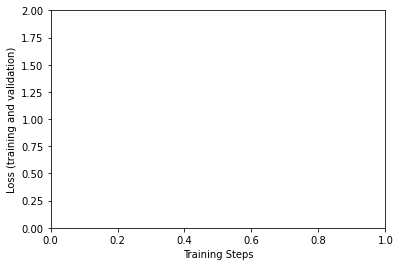

In [19]:
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(history["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])

In [8]:
# capture_video = cv2.VideoCapture("demo")

# cv2.imshow("In progress", capture_video)
# key = cv2.waitkey(1) & oxFF
    
# if key == ord("q"):
#     break


In [69]:
# import cv2
# import numpy as np

# # Create a VideoCapture object and read from input file
# # If the input is the camera, pass 0 instead of the video file name
# cap = cv2.VideoCapture('demo.mp4')

# (taken, frame) = cap.read()
# print(frame.shape)
# # Check if camera opened successfully
# if (cap.isOpened()== False): 
#   print("Error opening video stream or file")

# # Read until video is completed
# while(cap.isOpened()):
#   # Capture frame-by-frame
#   ret, frame = cap.read()
#   if ret == True:

#     # Display the resulting frame
#     cv2.imshow('Frame',frame)

#     # Press Q on keyboard to  exit
#     if cv2.waitKey(25) & 0xFF == ord('q'):
#       break

#   # Break the loop
#   else: 
#     break

# # When everything done, release the video capture object
# cap.release()

# # Closes all the frames
# cv2.destroyAllWindows()


(720, 1280, 3)
